# Notebook para pruebas y aprender data visualization

Este notebook lo he creado para hacer pruebas de visualización de datos. Como hasta ahora solamente había hecho cursos y ejercicios guiados he creado este notebook para ir respondiendo preguntas que me hago sobre un dataset por mi cuenta sin supervisión.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

filepath = 'input/vgsales.csv'
df = pd.read_csv(filepath, index_col='Rank')
df.shape

(16598, 10)

In [2]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Funciones de ayuda

In [3]:
import math

def total_sales_per_year(data):
    """Agrupa las ventas totales por año
    
    Parametros de entrada
    ------------
    data -> dataFrame con al menos los campos 'Year' y 'Global_Sales'
    
    
    Parametros de salida
    ------------
    Nuevo dataFrame con las cabeceras 'Year' y 'Global_total_sales'

    Ejemplo
    ------------

    
    Entrada: 2001 100, 2001 50, 2002 120
    Salida: 
    [
    Year Global_total_sales,
    2001 150,
    2002 120,
    2007 90,
    ]
    """
    sales_per_year = {}
    years = data['Year'].unique()
    
    for y in years:
        if math.isnan(y):
            continue

        year = int(y) # removes final .0
        sales_per_year[year] = 0
        data_per_year = data[data['Year'] == y]
        for i, row in data_per_year.iterrows():
            sales_per_year[year] += row['Global_Sales']

    df = pd.DataFrame(list(sales_per_year.items()),columns = ['Year','Global_total_sales'])
    df.set_index('Year')
    return df


In [4]:
def remove_nan_and_parse_to_int(data):
    res = []
    for d in data:
        if math.isnan(d):
            continue
        res.append(int(d))
    return res

def calculate_total_sales(sales):
    total_sales = 0

    for i, sale in sales.iterrows():
        total_sales += sale['Global_Sales']
    
    return total_sales

def calculate_sales_per_year(years, games):
    sales_per_year = []
    
    for year in years:
        from_one_year = games['Year'] == year
        
        one_year_sales = games[from_one_year]
        total_sales = calculate_total_sales(one_year_sales)

        sales_per_year.append(total_sales)
    
    return sales_per_year

def create_data_frame_with_sales_per_year_and_platforms(df):
    """Crea un nuevo dataFrame con cuatro columnas 'Index', 'Year', 'Platform', 'Total_sales'
    
    Parametros de entrada
    ------------
    df -> dataFrame con al menos los campos 'Year' 'Global_Sales' 'Platform'
    
    
    Parametros de salida
    ------------
    Nuevo dataFrame con formato para heatmap, de  la forma siguiente
    
    [plarform, 2001, 2002, 2003]
    [wii, 12, 23, 41, 1, 1]
    """
    years = sorted(df['Year'].unique())
    years = remove_nan_and_parse_to_int(years)
    platforms = df['Platform'].unique()
    
    rows = []
    for platform in platforms:
        from_one_platform = df['Platform'] == platform
        platform_games = df[from_one_platform]
        
        sales_per_year = calculate_sales_per_year(years, platform_games)

        rows.append(sales_per_year)

    new_data_frame = pd.DataFrame(rows, index=platforms, columns=years)
    
    new_data_frame.shape
    return new_data_frame

## Plataformas disponibles en el dataset

In [5]:
platforms = ""
for platform in df['Platform'].unique():
    platforms += platform + ", "
 
print(platforms[:-2]) # -2 in order to remove the last ',' character

Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, 3DS, PS4, N64, PS, XB, PC, 2600, PSP, XOne, GC, WiiU, GEN, DC, PSV, SAT, SCD, WS, NG, TG16, 3DO, GG, PCFX


## Cuantos juegos vendió Wii por año

Text(0.5, 1.0, 'Total Wii sales')

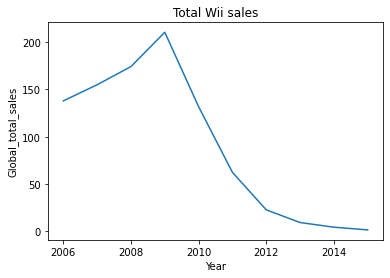

In [6]:
wii_games = df[df['Platform'] == 'Wii']
sales_per_year = total_sales_per_year(wii_games)
sns.lineplot(x=sales_per_year['Year'], y=sales_per_year['Global_total_sales'])
plt.title('Total Wii sales')

## Comparativa de ventas de juegos por año

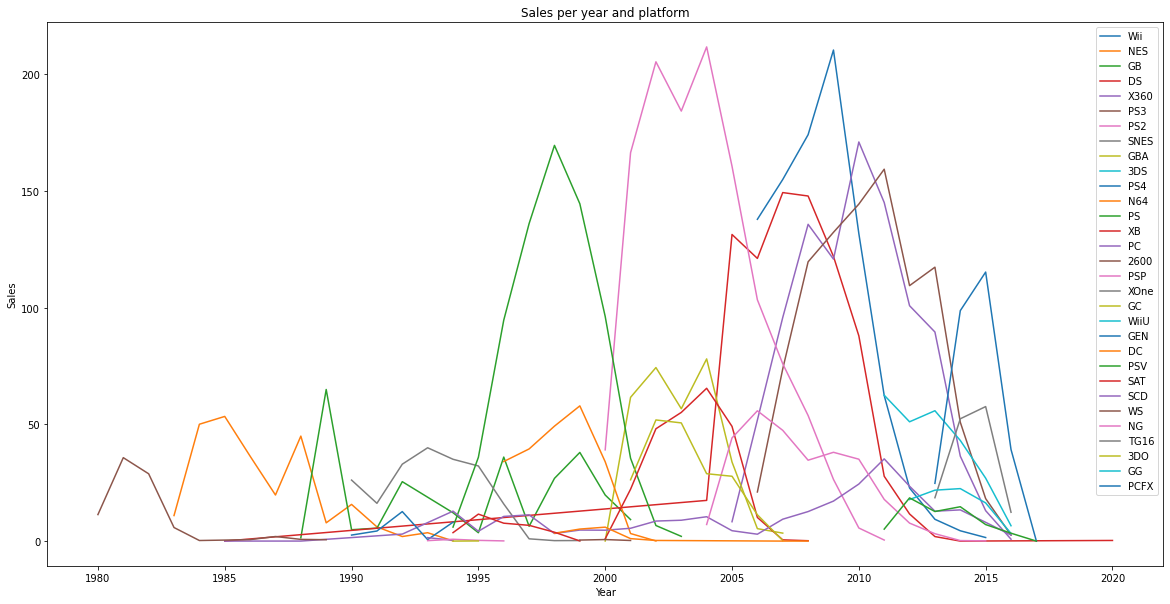

In [7]:
plt.figure(figsize=(20,10))
plt.title('Sales per year and platform')
plt.xlabel('Year')
plt.ylabel('Sales')

for platform in df['Platform'].unique():
    platform_games = df[df['Platform'] == platform]
    sales_per_year = total_sales_per_year(platform_games)
    sns.lineplot(x=sales_per_year['Year'], y=sales_per_year['Global_total_sales'], label=platform)


La idea de esta grafica era buena. Ver una comparativa de ventas de todas las plataformas a lo largo del tiempo pero una vez calculado no se puede diferenciar cada plataforma. Los colores de la leyenda se repiten porque son muchas plataformas.

A pesar de esto, podemos observar que hubo tres puntos donde despuntaron las ventas, aproximadamente: 1997, entre 2002 y 2005 y 2010

### Mapa de calor

Los mapas de calor necesitan un conjunto de datos el cual todo su contenido sean números para poder comparar sus valores y asignar colores en función de esto. Dónde único se puede tener valores no numéricos es en el índice y la cabecera.

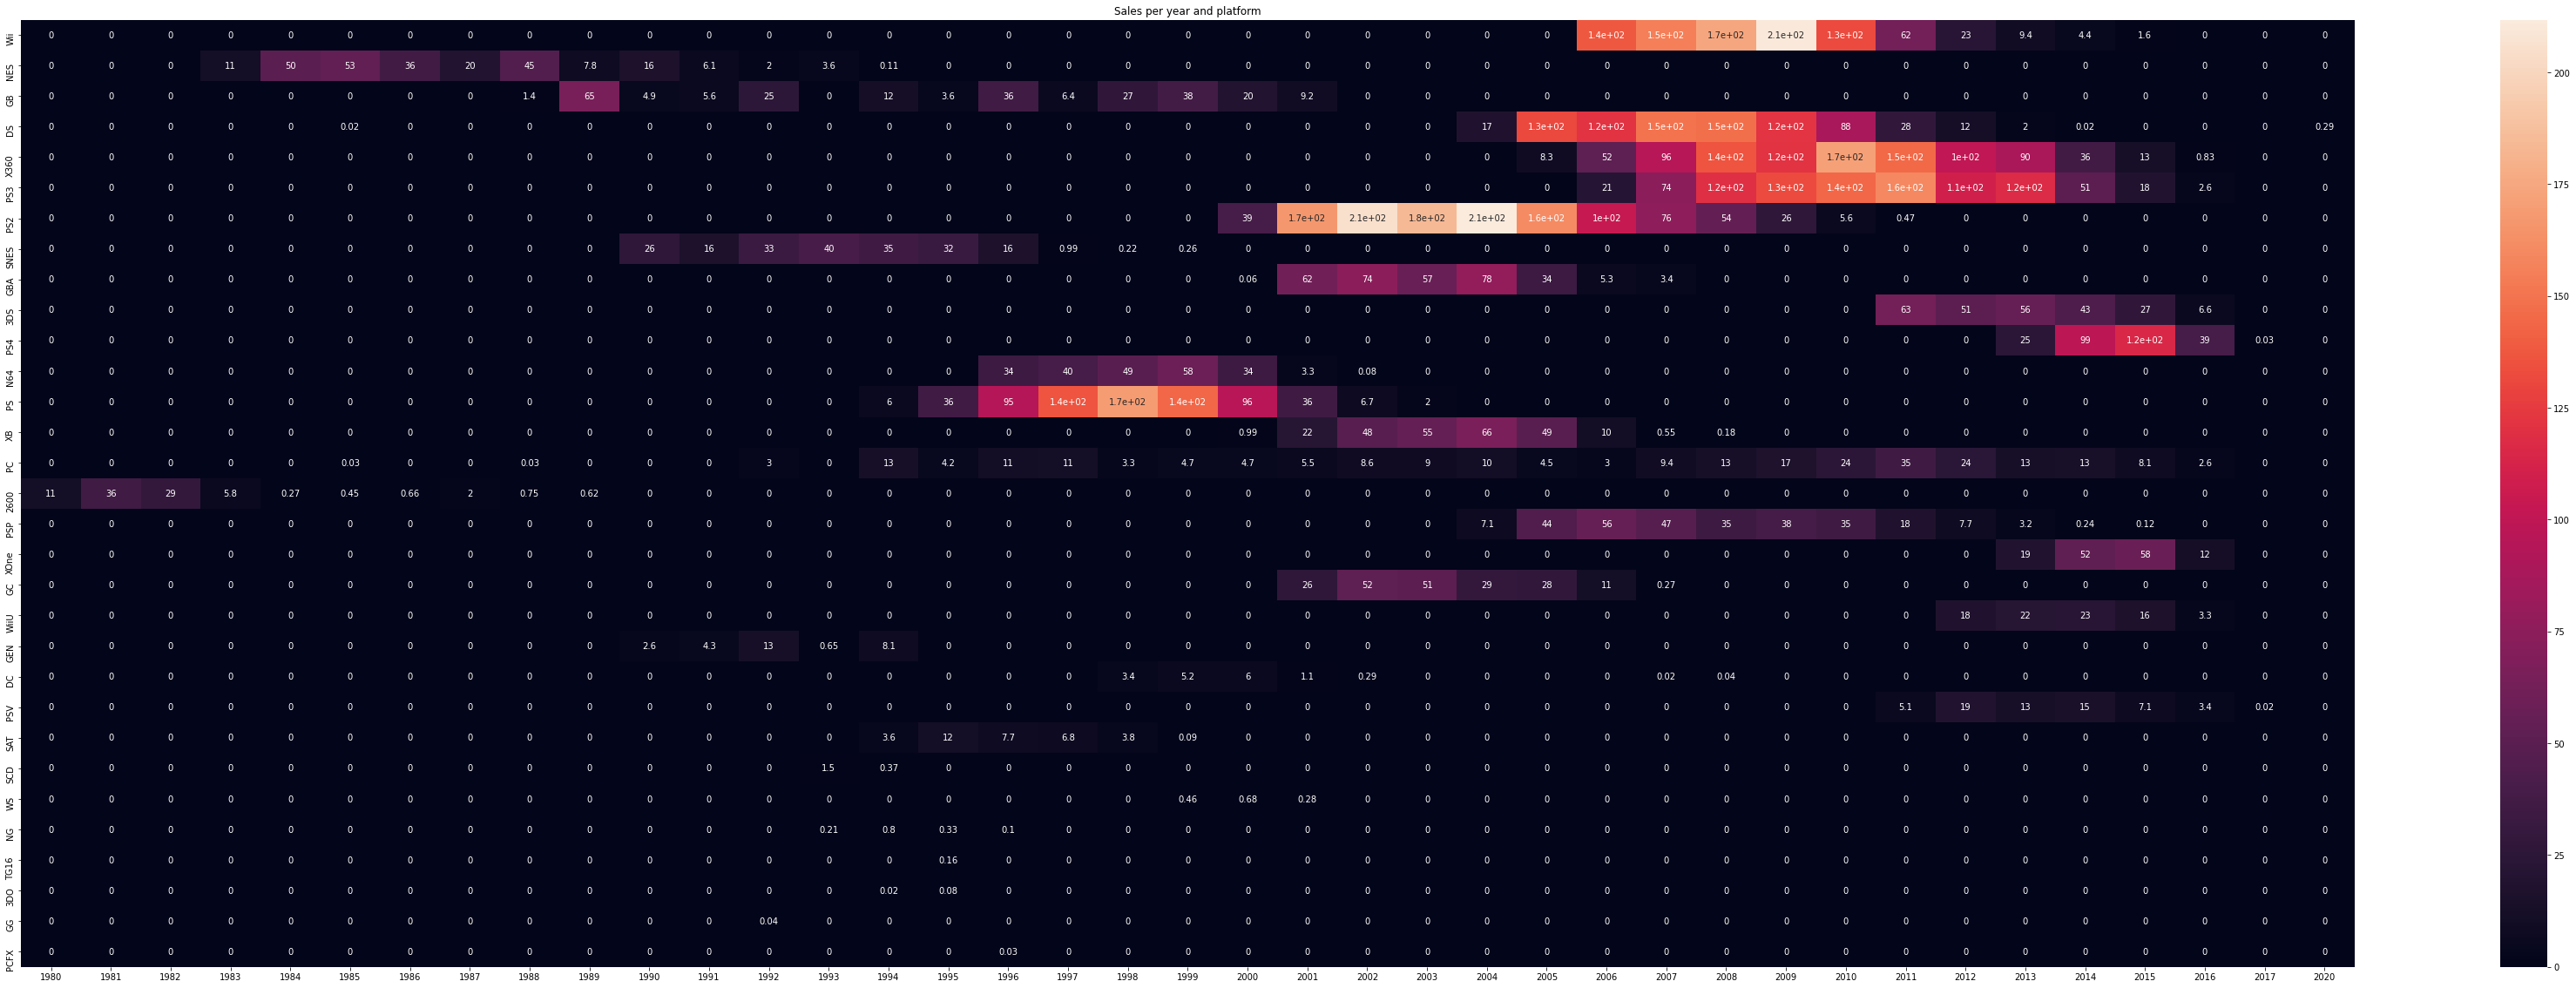

In [8]:
plt.figure(figsize=(60,20))
plt.title('Sales per year and platform')
plt.xlabel('Year')
plt.ylabel('Sales')

heat_map_data = create_data_frame_with_sales_per_year_and_platforms(df)
ax = sns.heatmap(heat_map_data, annot=True)

Como podemos ver en el gráfico anterior el groso de ventas de videojuegos ha sido por parte de las plataformas Wii, DS, X360, PS3, PS2, PS, N64, 3DS. Además de esto, vemos como estas ventas se centran desde el año 1995 hasta el 2017.

Por esta razón vamos a hacer un nuevo mapa de calor solamente con estos datos.

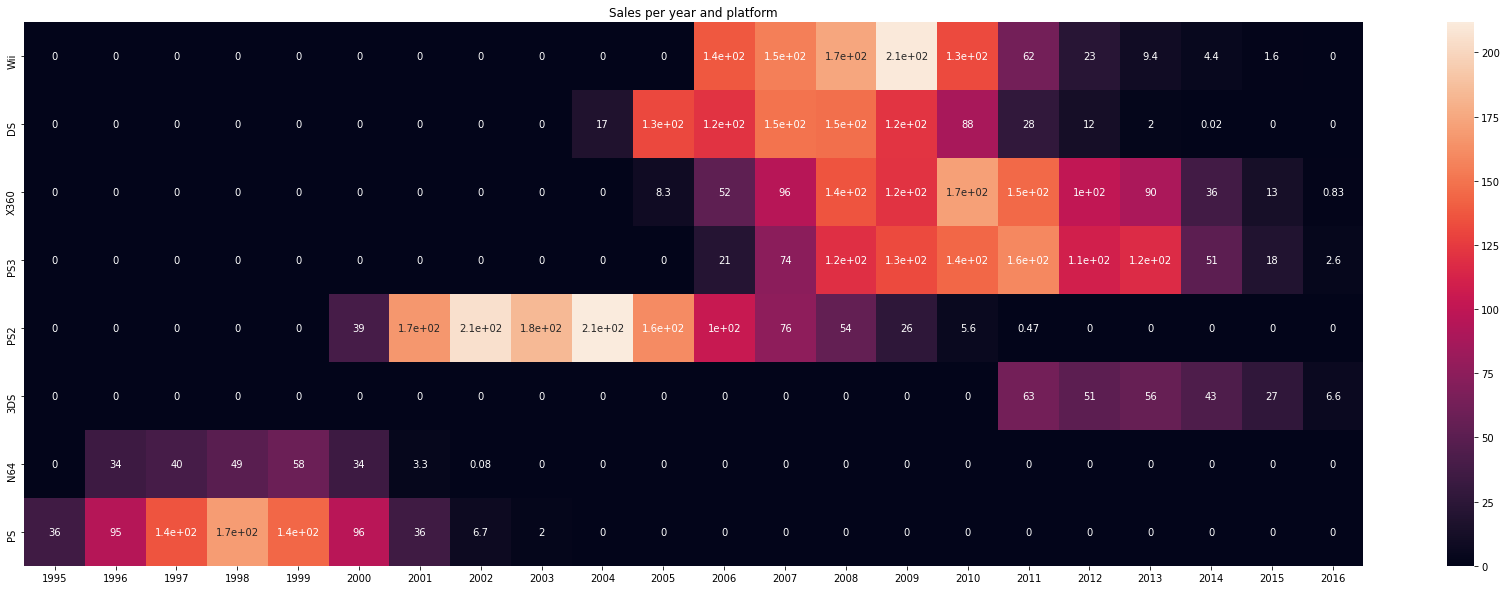

In [9]:
plt.figure(figsize=(30,10))
plt.title('Sales per year and platform')
plt.xlabel('Year')
plt.ylabel('Sales')

# platforms_to_show = ['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PS', 'N64', '3DS']
# years_to_show = range(1995, 2017)

data = df.query('Year>1994 and Year<2018 and (Platform == "Wii" or Platform == "DS" or Platform == "X360" or Platform == "PS3" or Platform == "PS2" or Platform == "PS" or Platform == "N64" or Platform == "3DS")')

heatmap_data = create_data_frame_with_sales_per_year_and_platforms(data)
ax = sns.heatmap(heatmap_data, annot=True)

La query que hacemos para obtener estos datos no es nada "elegante" escribimos muchos or para las distintas plataformas. ¿Se puede mejorar de alguna forma?

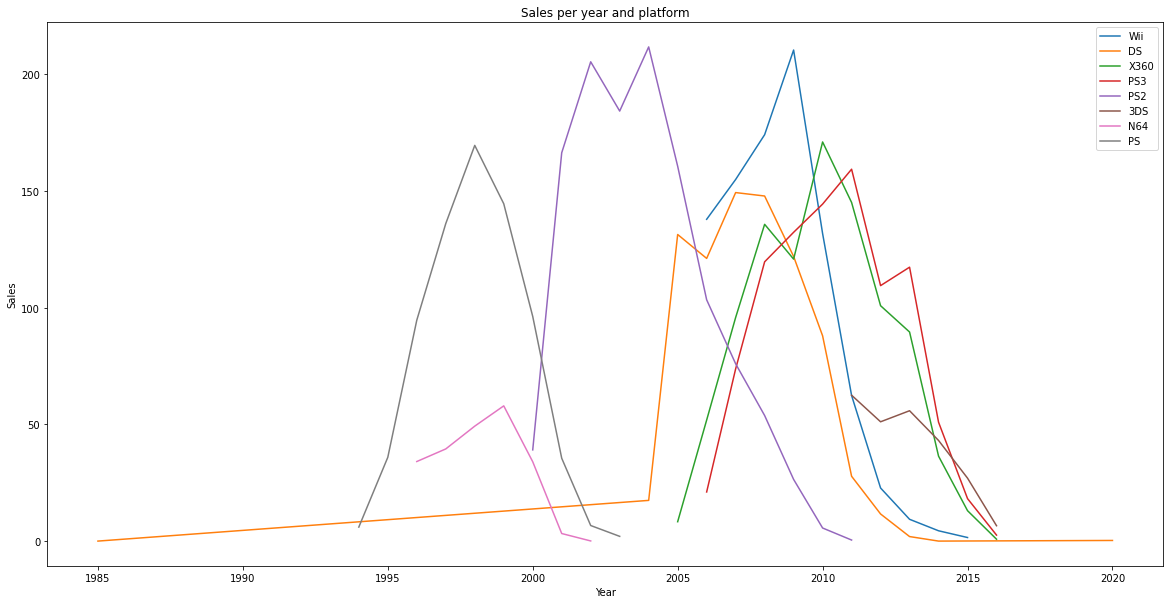

In [10]:
plt.figure(figsize=(20,10))
plt.title('Sales per year and platform')
plt.xlabel('Year')
plt.ylabel('Sales')

for platform in data['Platform'].unique():
    platform_games = df[df['Platform'] == platform]
    sales_per_year = total_sales_per_year(platform_games)
    sns.lineplot(x=sales_per_year['Year'], y=sales_per_year['Global_total_sales'], label=platform)

Grafico de puntos por genero y ventas totales, agrupados por color dependiendo de la plataforma

Queremos saber si hay una relacion entre el genero y la plataforma. Para esto tenemos que agrupar las ventas globales por plataforma y genero. De tal manera, que solamente tengamos una entrada de datos con una plataforma y un genero, no debe repetirse esta combinacion.

In [11]:
genre_platform_group = df.copy()
genre_platform_group = genre_platform_group.drop(columns=['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
genre_platform_group = genre_platform_group.groupby(['Genre', 'Platform']).sum().reset_index()
genre_platform_group.shape

(293, 3)

Con la operación `groupby` juntamos por la unión de estos dos campos `Genre` `Platform`, y sumamos el resto de valores de la fila. En este caso, las ventas globales. Para evitar que cree un índice nuevo con estos dos campos por los que agrupamos usamos la función `reset_index`. De esta forma los campos por los que hacemos la unión quedan accesibles mediante su columna correspondiente.

In [12]:
genre_platform_group.head()

,Genre,Platform,Global_Sales
0,Action,2600,29.34
1,Action,3DS,57.02
2,Action,DC,1.26
3,Action,DS,115.56
4,Action,GB,7.92


## ¿El genero de acción vende igual en todas las plataformas?

Text(0.5, 0, 'Platform')

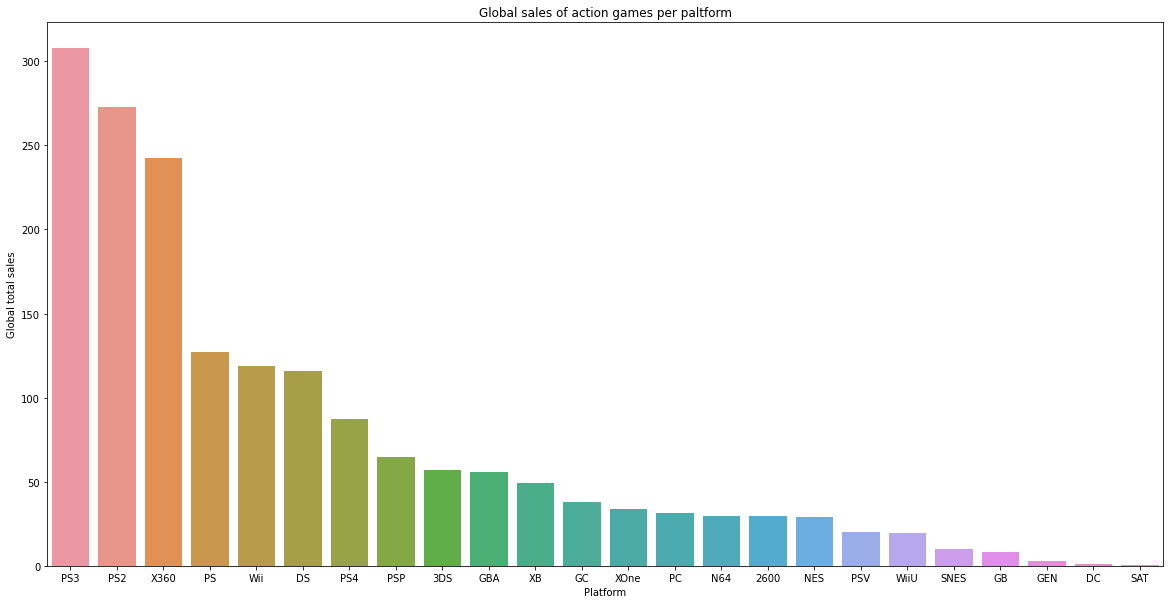

In [33]:
action_games = genre_platform_group[genre_platform_group['Genre'] == 'Action']

plt.figure(figsize=(20,10))
sns.barplot(x='Platform', y='Global_Sales', data=action_games, order=action_games.sort_values('Global_Sales', ascending=False).Platform)

plt.title("Global sales of action games per paltform")
plt.ylabel("Global total sales")
plt.xlabel("Platform")

## ¿En Wii vende todos los generos por igual?

Text(0.5, 0, 'Genre')

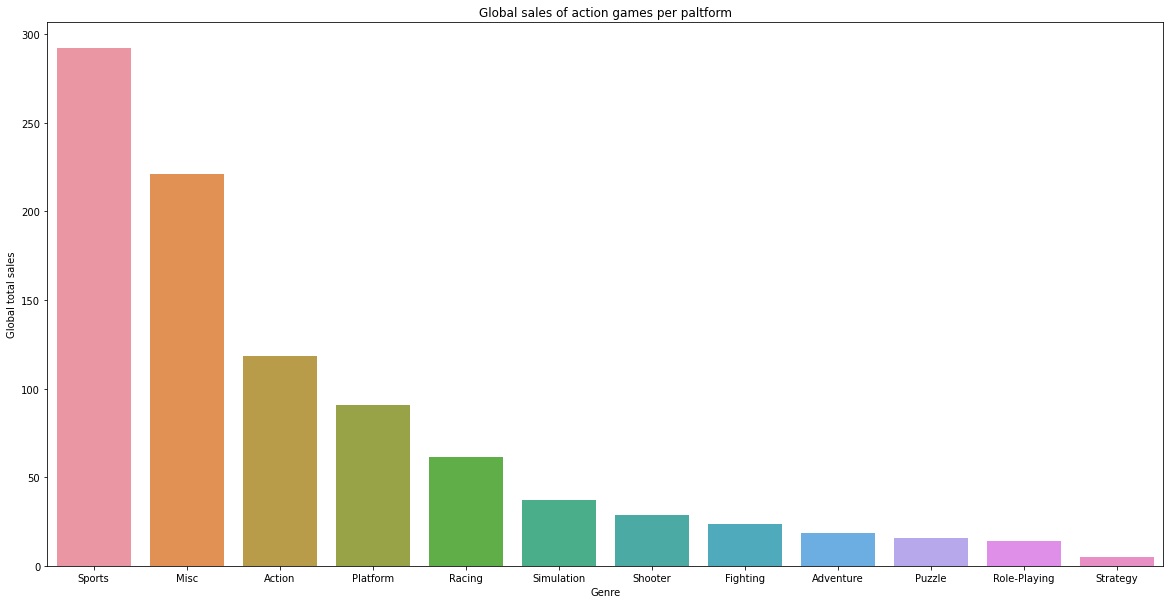

In [32]:
wii_games = genre_platform_group[genre_platform_group['Platform'] == 'Wii']

plt.figure(figsize=(20,10))
sns.barplot(x='Genre', y='Global_Sales', data=wii_games, order=wii_games.sort_values('Global_Sales', ascending=False).Genre)

plt.title("Global sales of action games per paltform")
plt.ylabel("Global total sales")
plt.xlabel("Genre")

En este caso el pico de ventas en juegos de deportes en la plataforma Wii se debe a que el juego "Wii sports" se "vendia" junto con la consola.

## ¿Que genero destaca en cada plataforma?

In [16]:
genre_platform_group = df.copy()
genre_platform_group = genre_platform_group.drop(columns=['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
genre_platform_group = genre_platform_group.groupby(['Genre', 'Platform']).sum().reset_index()

result = {}
for i, row in genre_platform_group.iterrows():
    platform = str(row['Platform'])
    global_sales = row['Global_Sales']
    
    if platform in result:
        if result[platform]['Global_Sales'] < global_sales:
            result[platform] = row
    else:
        result[platform] = row
        
most_sell_genre_per_platform = pd.DataFrame(result).T.reset_index().drop('index', axis=1).sort_values(by='Global_Sales', ascending=False)
most_sell_genre_per_platform

,Genre,Platform,Global_Sales
13,Action,PS3,307.88
19,Sports,Wii,292.06
21,Shooter,X360,278.55
12,Sports,PS2,273.41
3,Misc,DS,137.76
11,Action,PS,127.05
9,Platform,NES,95.78
4,Role-Playing,GB,88.24
14,Action,PS4,87.06
5,Platform,GBA,78.3


## ¿Cuál es elgénero más vendido?

Text(0.5, 0, 'Genre')

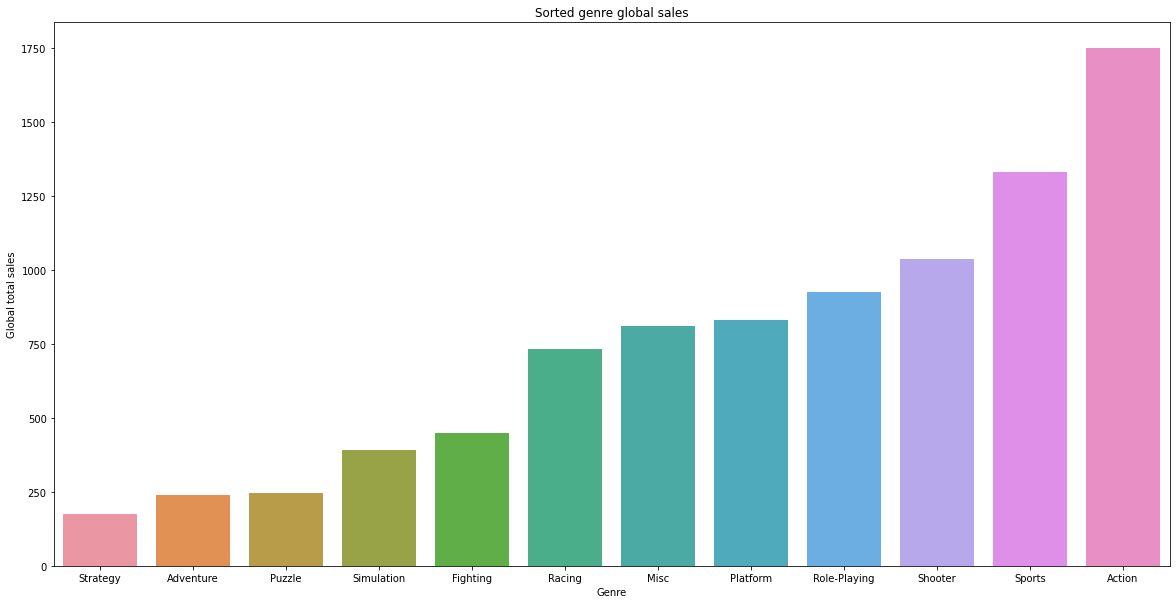

In [17]:
genre_global_sales = df.copy()
genre_global_sales = genre_global_sales.drop(columns=['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Platform'])
genre_global_sales = genre_global_sales.groupby(['Genre']).sum().reset_index().sort_values(by='Global_Sales')

plt.figure(figsize=(20,10))
sns.barplot(x=genre_global_sales['Genre'], y=genre_global_sales['Global_Sales'])

plt.title("Sorted genre global sales")
plt.ylabel("Global total sales")
plt.xlabel("Genre")

Text(0.5, 0, 'Platform')

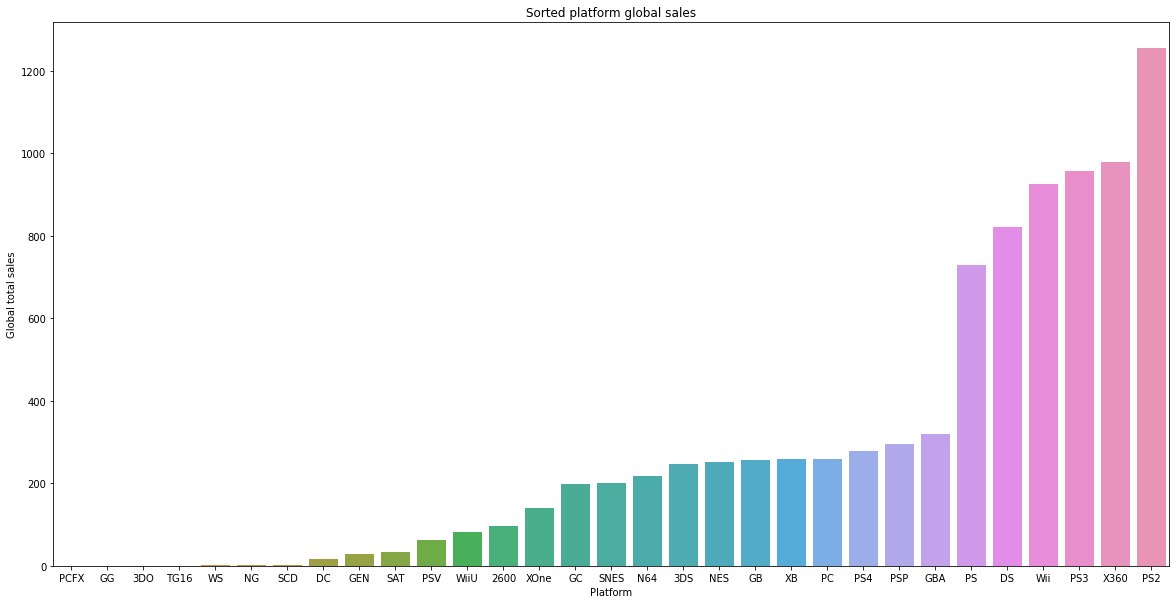

In [18]:
genre_global_sales = df.copy()
genre_global_sales = genre_global_sales.drop(columns=['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre'])
genre_global_sales = genre_global_sales.groupby(['Platform']).sum().reset_index().sort_values(by='Global_Sales')

plt.figure(figsize=(20,10))
sns.barplot(x=genre_global_sales['Platform'], y=genre_global_sales['Global_Sales'])

plt.title("Sorted platform global sales")
plt.ylabel("Global total sales")
plt.xlabel("Platform")

## ¿Cuál ha sido el año con mayor número de ventas?

Text(0.5, 0, 'Year')

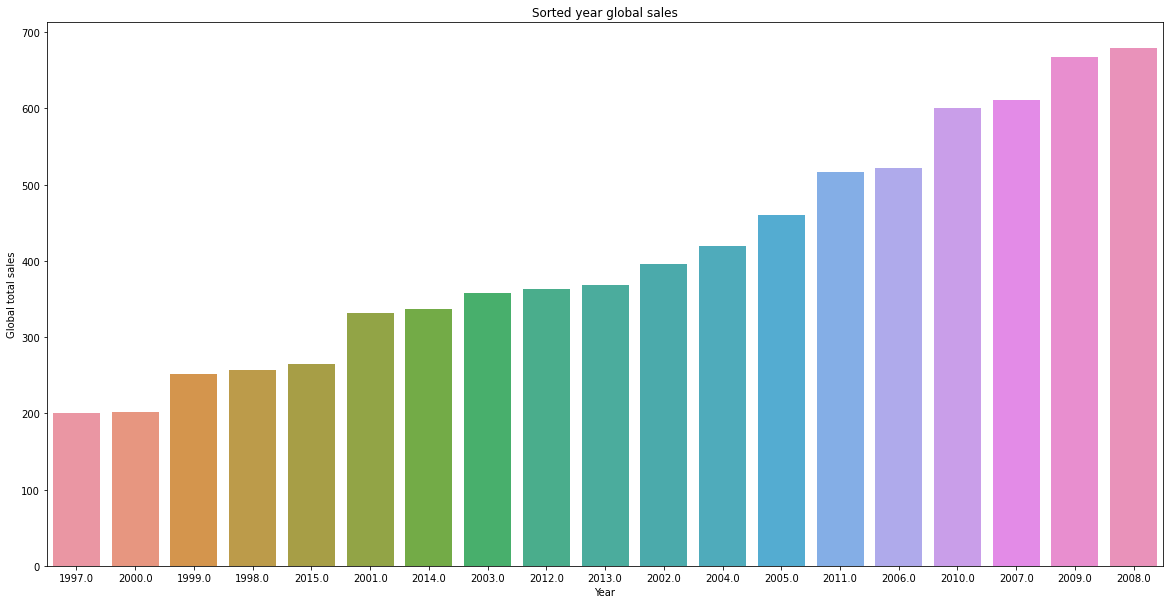

In [19]:
year_global_sales = df.copy()
year_global_sales = year_global_sales.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre', 'Platform'])
year_global_sales = year_global_sales.groupby(['Year']).sum().query('Global_Sales>200').reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='Global_Sales', data=year_global_sales, order=year_global_sales.sort_values('Global_Sales').Year)

plt.title("Sorted year global sales")
plt.ylabel("Global total sales")
plt.xlabel("Year")

In [20]:
games_sell = df.copy()
games_sell = games_sell[games_sell['Year']==2008]
games_sell


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
89,Pokémon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84
...,...,...,...,...,...,...,...,...,...,...
16578,Neo Angelique Special,PSP,2008.0,Adventure,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16583,Real Rode,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01
